In [1]:
import pytz
import os
import sqlite3
import re
import uproot
import IPython
import sys
import numpy as np
import pandas as pd
import pymap3d as pm
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from pandasql import sqldf
from rnog_data.runtable import RunTable
from datetime import datetime, timedelta
from NuRadioReco.modules.io.RNO_G.readRNOGDataMattak import readRNOGData
from NuRadioReco.utilities import units
from scipy.signal import hilbert
import matplotlib.gridspec as gridspec
from matplotlib.patches import FancyArrowPatch

from IPython.display import clear_output

from Flight import Flight
from FlightTracker import FlightTracker


# Create the figure
multiplier = 1

fig_width = 8.4
fig_height = 4.8
figsize = (fig_width * multiplier , fig_height * multiplier)

# Set font size parameters to match 11pt LaTeX document
font_size = 15
dpi = 300  # Set high DPI for both on-screen and saved figures

plt.rcParams.update({
    'font.size': font_size,          # Font size for text
    'axes.titlesize': font_size,     # Font size for axes title
    'axes.labelsize': font_size,     # Font size for axes labels
    'xtick.labelsize': font_size,    # Font size for x-axis tick labels
    'ytick.labelsize': font_size,    # Font size for y-axis tick labels
    'legend.fontsize': font_size,    # Font size for legend
    'figure.figsize': [fig_width, fig_height],  # Figure size
    'figure.dpi': 100,               # Figure resolution
})

In [5]:
'''
reader = readRNOGData()

reader.begin([f'/home/oliver/software/Flights/combined_handcarry/station11/run1313'], overwrite_sampling_rate=3200*units.MHz, apply_baseline_correction='approximate')

channel_number = 13
for i in range(4773):
    event = reader.get_event_by_index(i)
    station = event.get_station()
    channel = station.get_channel(channel_number)
    trace = channel.get_trace()
    plt.plot(trace)
    plt.savefig(f'./test_traces/channel_{channel_number}_{i}.png')
    plt.close()
    print(i)
'''
''

''

# Skier31

In [2]:
#tracker = FlightTracker("2023-05-12 14:28:54", "2023-05-12 16:24:02")#skier glaube ich
#tracker = FlightTracker('2022-08-17 00:00:00', R2 = 5000)#("2022-08-17 10:47:50", "2022-08-17 10:50:52", R2 = 200)#jal43
#tracker = FlightTracker("2023-05-07 13:38:34", "2023-05-07 13:56:44")#CPA085
tracker = FlightTracker("2022-08-23 15:20:27", "2022-08-23 15:30:27")#skier31
print(tracker.get_times())


stations = FlightTracker.init_stations()
times = pd.to_datetime(tracker.flights.readtime_utc, format='ISO8601').astype('int64') / 10**9
start_time = pd.to_datetime(tracker.flights_distinct.mintime.iloc[0])
stop_time = pd.to_datetime(tracker.flights_distinct.maxtime.iloc[0])

header_df = FlightTracker.get_df_from_handcarry_data(tracker.start_time, tracker.stop_time, stations = [11], rebuild_combined_scores=False)


tracker.flights_distinct
header_df

INFO:runtable_database:database connection to RNOG_live established


"2022-08-23T15:20:27" "2022-08-23T15:30:27"
None
Not processing station station12, run run566
Not processing station station13, run run601
Not processing station station21, run run1711
Not processing station station22, run run1633
Not processing station station23, run run619
Not processing station station24, run run460
./combined_scores_handcarry/station11_run1313_scores.db


,trigger_time,station_number,radiant_triggers,run_number,event_number,lt_triggers,force_triggers,ext_triggers,index,l1,amp,SNR,imp,max_freq,max_spectrum
1496,1.661268e+09,11,False,1313,1496,True,False,False,1496,"[0.025344327256255725, 0.014571940573119151, 0...","[0.025614351185327493, 0.026599510375610962, 0...","[5.22388587640303, 4.484098233758619, 5.238803...","[0.0, 0.02429488500658339, 0.01573032882027703...","[0.2859375, 0.3046875, 0.45156250000000003, 0....","[0.4912659176890631, 0.4508031663096087, 0.342..."
1497,1.661268e+09,11,False,1313,1497,True,False,False,1497,"[0.021058010367293, 0.026783222285189524, 0.01...","[0.018103451318840103, 0.023216498717989944, 0...","[3.692085072715438, 3.9137961347909496, 4.9400...","[0.012909670090113678, 0.0, 0.0080374766742365...","[0.134375, 0.30000000000000004, 0.287500000000...","[0.43369782260518014, 0.6137480371238263, 0.31..."
1498,1.661268e+09,11,False,1313,1498,False,True,False,1498,"[0.02026920370993699, 0.020839694080045667, 0....","[0.019243451063355434, 0.02768970421875662, 0....","[3.9245808529672526, 4.667881176281736, 3.9256...","[0.02707114761563023, 0.0, 0.01064241303746182...","[0.1875, 0.375, 0.30625, 0.403125, 0.328125, 0...","[0.4008185189134347, 0.5326523122346981, 0.304..."
1499,1.661268e+09,11,False,1313,1499,True,False,False,1499,"[0.01645990456538245, 0.017546130656941775, 0....","[0.016442063102880527, 0.020007229314563692, 0...","[3.3532553918939643, 3.372783196569575, 3.3336...","[0.0, 0.0027845583777137417, 0.006611365550019...","[0.278125, 0.259375, 0.125, 0.2875000000000000...","[0.3940496019292794, 0.5001644105434703, 0.329..."
1500,1.661268e+09,11,False,1313,1500,True,False,False,1500,"[0.01993525869717208, 0.019297070306655503, 0....","[0.0207580719569007, 0.027039248209292023, 0.0...","[4.233478261168181, 4.558228457040249, 3.25310...","[0.022464602008194667, 0.0, 0.0, 0.0, 0.013123...","[0.27968750000000003, 0.40937500000000004, 0.2...","[0.4188403158266498, 0.5474984714678579, 0.344..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2613,1.661269e+09,11,False,1313,2613,True,False,False,2613,"[0.022024005279026315, 0.02339533149113997, 0....","[0.015581469580035708, 0.021616703933395463, 0...","[3.177742753811287, 3.644105570315227, 3.52686...","[0.0, 0.01194685982608057, 0.0, 0.0, 0.0032015...","[0.3640625, 0.37812500000000004, 0.10625000000...","[0.4451698818849509, 0.5577917159903353, 0.386..."
2614,1.661269e+09,11,False,1313,2614,True,False,False,2614,"[0.017078318690530007, 0.020460027831448048, 0...","[0.021443521874827846, 0.021104201920964377, 0...","[4.373271462226983, 3.5577088909670573, 3.8111...","[0.0, 0.013422319626928303, 0.0119427606806188...","[0.4265625, 0.1328125, 0.35000000000000003, 0....","[0.390768158936373, 0.5313652790475611, 0.3058..."
2615,1.661269e+09,11,False,1313,2615,True,False,False,2615,"[0.01711291317304534, 0.016150765294421242, 0....","[0.022427306412182758, 0.019705749584964884, 0...","[4.573908133166977, 3.32196027900762, 3.802236...","[0.0, 0.0, 0.009084907053632296, 0.0, 0.025894...","[0.3140625, 0.36250000000000004, 0.39687500000...","[0.3898153915978578, 0.46575722694919536, 0.31..."
2616,1.661269e+09,11,False,1313,2616,True,False,False,2616,"[0.014176092353778045, 0.018034179566657732, 0...","[0.02246575972842563, 0.024398677194697602, 0....","[4.581750445243071, 4.113085683528386, 4.03276...","[0.020766837130860694, 0.04187068498086077, 0....","[0.3671875, 0.27968750000000003, 0.31562500000...","[0.33847150500736306, 0.48691641329336255, 0.3..."


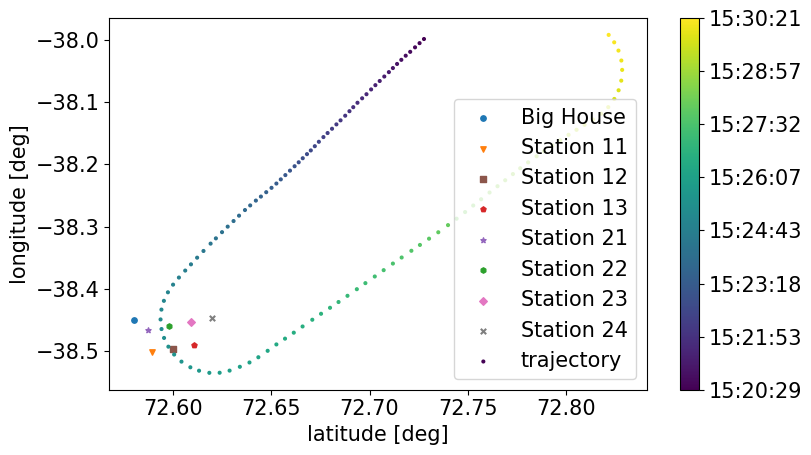

In [ ]:
fig, ax = plt.subplots(figsize = figsize)

#------------------------------------------------------------------------------------------------------
# ax_left
ax.set_xlabel('latitude [deg]')
ax.set_ylabel('longitude [deg]')

#------------------------------------------------------------------------------------------------------
# set ticks for time colorbar
ticks = np.linspace(start_time.timestamp(), stop_time.timestamp(), 8)
tick_times = pd.to_datetime(ticks, unit = 's').strftime('%H:%M:%S')
    
#------------------------------------------------------------------------------------------------------
# stations
markers = ['o', 'v', 's', 'p', '*', 'h', 'D', 'x']
colors = ['C0', 'C1', 'C5', 'C3', 'C4', 'C2', 'C6', 'C7']
for i in range(len(stations)):
    ax.scatter(stations.latitude[i], stations.longitude[i], color = colors[i], marker = markers[i], label = stations['Station Name'][i], s = 15)



sc = ax.scatter(tracker.flights.latitude, tracker.flights.longitude, marker = '.', c = times, cmap = 'viridis', s = 15, label = 'trajectory')
cbar = fig.colorbar(sc, ax=ax)
cbar.set_ticks(ticks)
cbar.set_ticklabels(tick_times)



ax.legend()

plt.tight_layout()
fig.savefig(f'/home/oliver/thesis/figures/flights/Skier31.pdf', dpi = 300, bbox_inches='tight')

0.07500000000000001


[Text(1661268028, 0, '15:20:28'),
 Text(1661268147, 0, '15:22:27'),
 Text(1661268266, 0, '15:24:26'),
 Text(1661268384, 0, '15:26:24'),
 Text(1661268503, 0, '15:28:23'),
 Text(1661268622, 0, '15:30:22')]

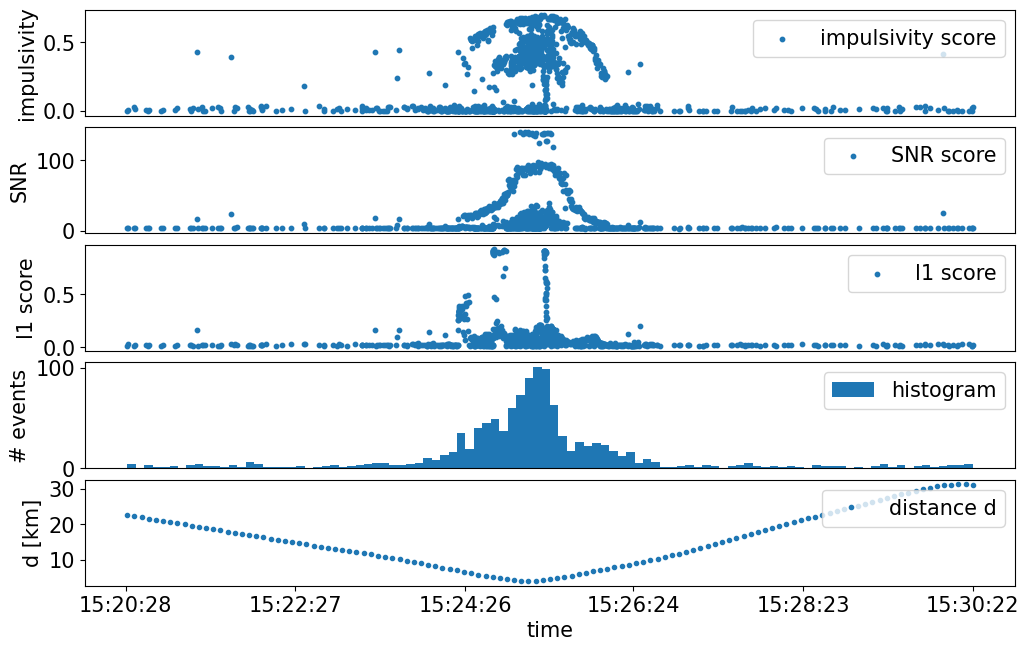

In [7]:

# Create the figure
multiplier = 1

fig_width = 12
fig_height = 8
figsize = (fig_width * multiplier , fig_height * multiplier)

# Set font size parameters to match 11pt LaTeX document
font_size = 15
dpi = 300  # Set high DPI for both on-screen and saved figures

plt.rcParams.update({
    'font.size': font_size,          # Font size for text
    'axes.titlesize': font_size,     # Font size for axes title
    'axes.labelsize': font_size,     # Font size for axes labels
    'xtick.labelsize': font_size,    # Font size for x-axis tick labels
    'ytick.labelsize': font_size,    # Font size for y-axis tick labels
    'legend.fontsize': font_size,    # Font size for legend
    'figure.figsize': [fig_width, fig_height],  # Figure size
    'figure.dpi': 100,               # Figure resolution
})

import ast
# Function to safely evaluate the strings to arrays
def safe_literal_eval(val):
    try:
        if isinstance(val, str):
            return ast.literal_eval(val)
        return val
    except (ValueError, SyntaxError):
        return val

# Apply the function to the column
# l1
header_df['l1'] = header_df['l1'].apply(
    lambda x: safe_literal_eval(x)
)
# SNR
header_df['SNR'] = header_df['SNR'].apply(
    lambda x: safe_literal_eval(x)
)
# impulsivity
header_df['imp'] = header_df['imp'].apply(
    lambda x: safe_literal_eval(x)
)
# max_freq
header_df['max_freq'] = header_df['max_freq'].apply(
    lambda x: safe_literal_eval(x)
)
# max_spectrum
header_df['max_spectrum'] = header_df['max_spectrum'].apply(
    lambda x: safe_literal_eval(x)
)

fig, ax = plt.subplots(5, figsize=figsize)
for i in [13]:
    channel = i

    imp = header_df.imp.apply(lambda x: float(x[channel]))
    freq_max = header_df.max_freq.apply(lambda x: x[channel])

    cmap = plt.get_cmap('viridis')
    vmin, vmax = min(freq_max), 0.2

    print(vmin)
    normalize = plt.Normalize(vmin=vmin, vmax=vmax)
    colors_freq = cmap(normalize(freq_max))

    ax[0].scatter(header_df.trigger_time, imp, s=10, label='impulsivity score')
    #ax[0].scatter([], [], label=f'channel: {channel}')

    # SNR
    SNR = header_df.SNR.apply(lambda x: x[channel])
    ax[1].scatter(header_df.trigger_time, SNR, s=10, label='SNR score')

    # l1
    l1 = header_df.l1.apply(lambda x: x[channel])
    ax[2].scatter(header_df.trigger_time, l1, s=10, label='l1 score')

    ax[3].hist(header_df.trigger_time, bins=100, label='histogram')

    readtime = pd.to_datetime(tracker.flights.readtime_utc, format='ISO8601')

    # Convert the datetime to timestamp
    timestamp = readtime.apply(lambda x: x.timestamp())

    ax[4].plot(timestamp, np.sqrt(tracker.flights.r2), '.', label='distance d')

# Manually adjust subplot positions to increase space between ax[3] and ax[4]
pos0 = ax[0].get_position()
pos1 = ax[1].get_position()
pos2 = ax[2].get_position()
pos3 = ax[3].get_position()
pos4 = ax[4].get_position()


hspace = 0.0125

ax[0].set_position([pos0.x0, pos0.y0, pos0.width, pos0.height])
ax[1].set_position([pos1.x0, pos1.y0 + 1 * hspace, pos1.width, pos1.height])
ax[2].set_position([pos2.x0, pos2.y0 + 2 * hspace, pos2.width, pos2.height])
ax[3].set_position([pos3.x0, pos3.y0 + 3 * hspace, pos3.width, pos3.height])
ax[4].set_position([pos4.x0, pos4.y0 + 4 * hspace, pos4.width, pos4.height])

for axes in ax:
    axes.legend(loc='upper right')
    axes.set_xticks([])
    ax[0].set_ylabel('impulsivity')
    ax[1].set_ylabel('SNR')
    ax[2].set_ylabel('l1 score')
    ax[3].set_ylabel('# events')
    ax[4].set_ylabel('d [km]')
    ax[4].set_xlabel('time')
#cbar = fig.colorbar(plt.cm.ScalarMappable(norm=normalize, cmap=cmap), ax=ax, label='frequency of max(spectrum) [GHz]')
num_ticks = 6
xticks = np.linspace(min(header_df.trigger_time), max(header_df.trigger_time), num_ticks).astype(int)

tick_labels = [datetime.utcfromtimestamp(x).strftime('%H:%M:%S') for x in xticks]

ax[4].set_xticks(xticks)
ax[4].set_xticklabels(tick_labels, rotation=0, ha='center')


#plt.tight_layout()
#fig.savefig(f'/home/oliver/thesis/figures/flights/Skier31_scores.pdf', dpi = 300, bbox_inches='tight')

In [14]:
l1_bursts = header_df[['trigger_time', 'station_number', 'radiant_triggers', 'run_number',
       'event_number', 'lt_triggers', 'force_triggers', 'ext_triggers',
       'index']].copy()

l1_bursts['l1'] = header_df.l1.apply(lambda x: x[channel])


l1_bursts['imp'] = header_df.imp.apply(lambda x: x[channel])

trigger_time = pd.to_datetime(l1_bursts.trigger_time * 10**9)

# Convert the datetime to timestamp
timestamp = trigger_time.apply(lambda x: x.time())

l1_bursts['time'] = timestamp

l1_bursts = sqldf('Select time, station_number || "_" || run_number || "_" || event_number as fk_station_run_event, * from l1_bursts order by l1, imp desc')
pd.set_option("display.max_rows", None)
l1_bursts

,time,fk_station_run_event,trigger_time,station_number,radiant_triggers,run_number,event_number,lt_triggers,force_triggers,ext_triggers,index,l1,imp,time
0,15:24:29.105202,11_1313_1671,1.661268e+09,11,0,1313,1671,1,0,0,1671,0.012477,0.000601,15:24:29.105202
1,15:26:01.984482,11_1313_2464,1.661268e+09,11,0,1313,2464,1,0,0,2464,0.012737,0.007217,15:26:01.984482
2,15:24:03.609538,11_1313_1593,1.661268e+09,11,0,1313,1593,1,0,0,1593,0.012832,0.000765,15:24:03.609538
3,15:26:24.522002,11_1313_2524,1.661268e+09,11,0,1313,2524,1,0,0,2524,0.012978,0.011269,15:26:24.522002
4,15:26:23.926274,11_1313_2522,1.661268e+09,11,0,1313,2522,1,0,0,2522,0.013081,0.000000,15:26:23.926274
5,15:24:57.810537,11_1313_1868,1.661268e+09,11,0,1313,1868,1,0,0,1868,0.013096,0.026750,15:24:57.810537
6,15:25:18.397339,11_1313_2157,1.661268e+09,11,0,1313,2157,1,0,0,2157,0.013184,0.000000,15:25:18.397339
7,15:24:44.388805,11_1313_1773,1.661268e+09,11,0,1313,1773,1,0,0,1773,0.013212,0.004406,15:24:44.388805
8,15:26:00.891827,11_1313_2458,1.661268e+09,11,0,1313,2458,1,0,0,2458,0.013340,0.003817,15:26:00.891827
9,15:24:16.009166,11_1313_1615,1.661268e+09,11,0,1313,1615,1,0,0,1615,0.013354,0.013772,15:24:16.009166


INFO:NuRadioReco.readRNOGData:Set 0 selector(s)
INFO:NuRadioReco.readRNOGData:Parse through / read-in 1 directory(ies) / file(s).
/home/oliver/anaconda3/envs/work/lib/python3.11/site-packages/mattak/Dataset.py:214: UserWarning: data_dir is deprecated, use data_path instead. This may be removed in the future, breaking your code.
  warnings.warn("data_dir is deprecated, use data_path instead. This may be removed in the future, breaking your code.")
INFO:NuRadioReco.readRNOGData:4773 events in 1 runs/datasets have been found using the uproot Mattak backend.


Using uproot backend
Open waveforms.root (Found full run folder) ...
1797 11 1313
1797    [0.15156250000000002, 0.15156250000000002, 0.1...
Name: max_freq, dtype: object


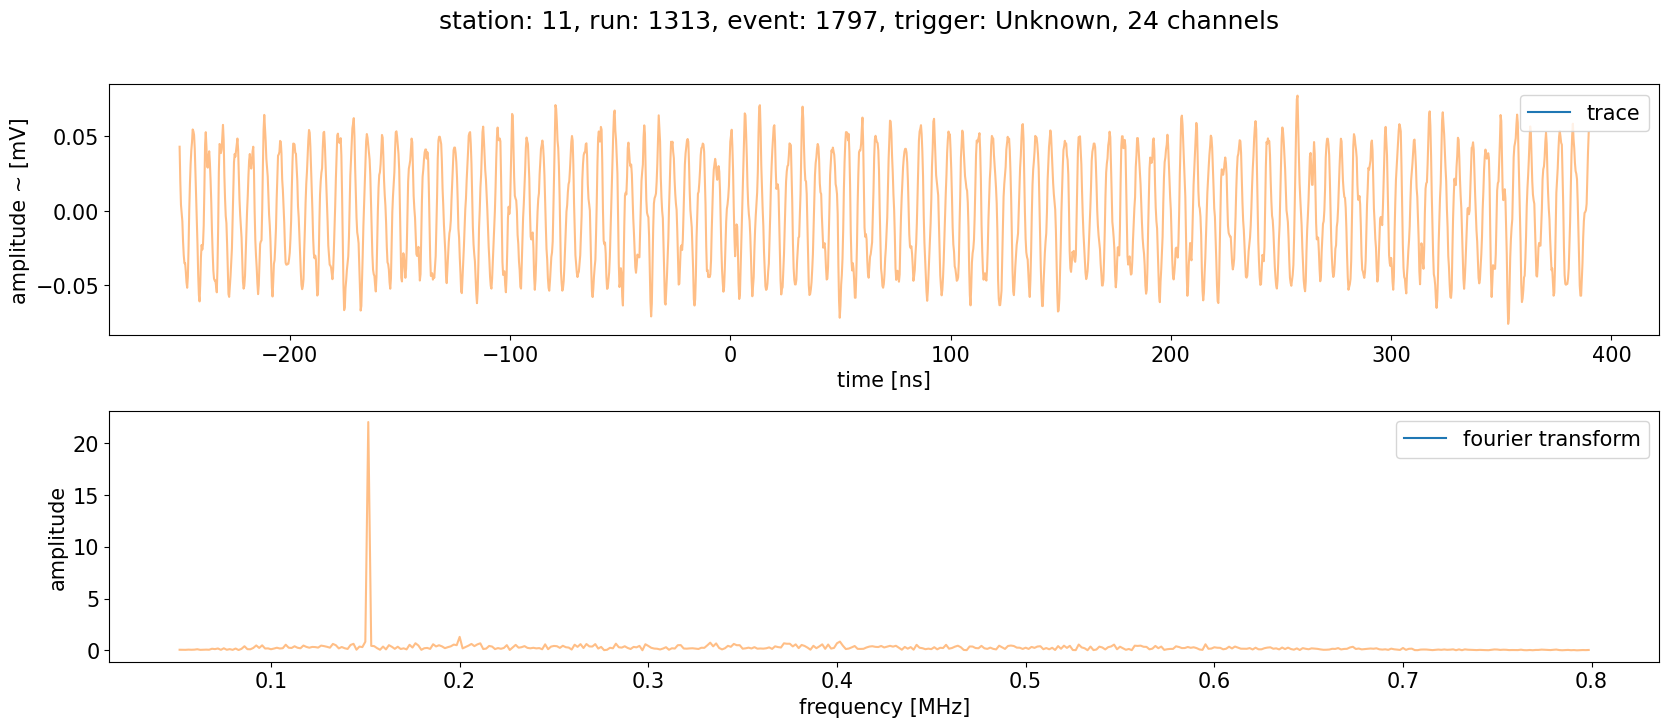

In [3]:
from Flight import Flight
Flight.plot_event_by_id(fk_station_run_event = '11_1313_1797', channels = [13])
print(header_df.max_freq[header_df.event_number == 1797])

In [ ]:
#11_1313_2297

# Example trace

In [3]:
reader = readRNOGData()

reader.begin([f'/home/oliver/software/Flights/combined_handcarry/station11/run1313'], overwrite_sampling_rate=3200*units.MHz, apply_baseline_correction='approximate')
event = reader.get_event_by_index(1)
print('event_nr: ', event.get_id())
station = event.get_station()

channel_number = 13

channel = station.get_channel(channel_number)
full_trace = channel.get_trace()
freq = channel.get_frequencies()
mask  = (0.05 < freq) & (freq < 0.8) & (freq != 0.2)
freq = freq[mask]
spectrum = np.abs(channel.get_frequency_spectrum())
l1 = Flight.simple_l1(spectrum)
print(l1)
spectrum = spectrum[mask]

INFO:runtable_database:database connection to RNOG_live established
INFO:NuRadioReco.readRNOGData:Set 0 selector(s)
INFO:NuRadioReco.readRNOGData:Parse through / read-in 1 directory(ies) / file(s).
/home/oliver/anaconda3/envs/work/lib/python3.11/site-packages/mattak/Dataset.py:214: UserWarning: data_dir is deprecated, use data_path instead. This may be removed in the future, breaking your code.
  warnings.warn("data_dir is deprecated, use data_path instead. This may be removed in the future, breaking your code.")


Using uproot backend
Open waveforms.root (Found full run folder) ...


INFO:NuRadioReco.readRNOGData:4773 events in 1 runs/datasets have been found using the uproot Mattak backend.


event_nr:  1
0.02074047508135058


f: 0.1375 amp:  0.9226090271466009 l1:  0.02074047508135058


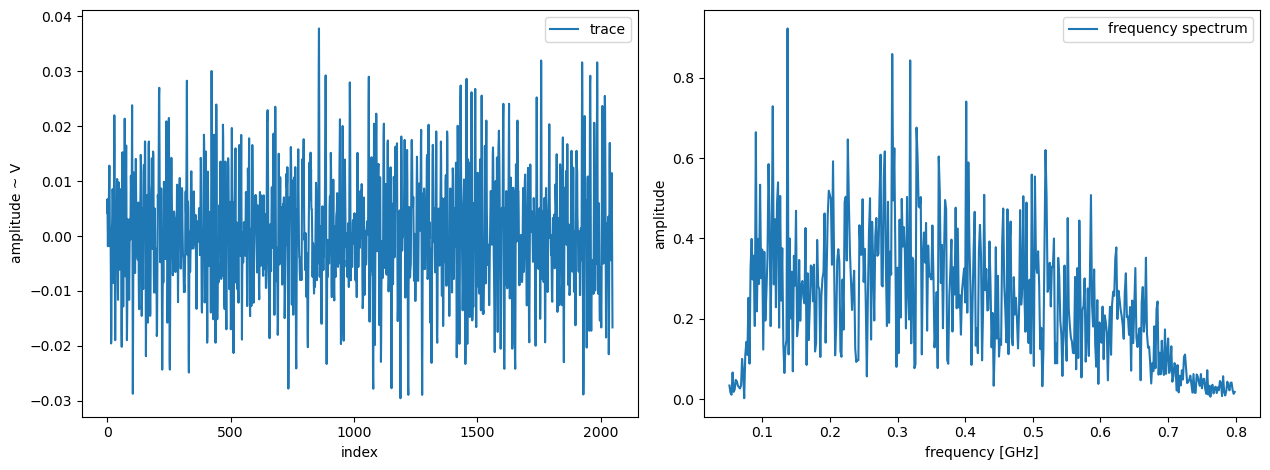

In [6]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (6.4 *2 , 4.8))

#------------------------------------------------------------------------------------------------------------------------
trace = full_trace
# Plot the full trace
xlabel = 'index'
ylabel = 'amplitude ~ V'

ax1.plot(trace, zorder=1, label='trace')
ax1.set_xlabel(xlabel)
ax1.set_ylabel(ylabel)



#------------------------------------------------------------------------------------------------------------------------
# l1
ax2.plot(freq, spectrum, label = 'frequency spectrum')

#ymax_index = np.argmax(spectrum)
#ax2.plot(freq[ymax_index], spectrum[ymax_index], 'x', color = 'C1', label = 'max(spectrum)')

print('f:', freq[ymax_index], 'amp: ', spectrum[ymax_index], 'l1: ', l1)


xlabel = 'frequency [GHz]'
ylabel = 'amplitude'

ax2.set_xlabel(xlabel)
ax2.set_ylabel(ylabel)


ax1.legend()
ax2.legend()

plt.tight_layout()
#fig.savefig('/home/oliver/thesis/figures/scores_multi_ax/example_trace.pdf')

# l1

In [2]:
reader = readRNOGData()

reader.begin([f'/home/oliver/software/Flights/combined_handcarry/station11/run1313'], overwrite_sampling_rate=3200*units.MHz, apply_baseline_correction='approximate')
event = reader.get_event_by_index(534)
print('event_nr: ', event.get_id())
station = event.get_station()

channel_number = 13

channel = station.get_channel(channel_number)
full_trace = channel.get_trace()
freq = channel.get_frequencies()
mask  = (0.05 < freq) & (freq < 0.8) & (freq != 0.2)
freq = freq[mask]
spectrum = np.abs(channel.get_frequency_spectrum())
l1 = Flight.simple_l1(spectrum)
print(l1)
spectrum = spectrum[mask]

INFO:runtable_database:database connection to RNOG_live established
INFO:NuRadioReco.readRNOGData:Set 0 selector(s)
INFO:NuRadioReco.readRNOGData:Parse through / read-in 1 directory(ies) / file(s).
/home/oliver/anaconda3/envs/work/lib/python3.11/site-packages/mattak/Dataset.py:214: UserWarning: data_dir is deprecated, use data_path instead. This may be removed in the future, breaking your code.
  warnings.warn("data_dir is deprecated, use data_path instead. This may be removed in the future, breaking your code.")
INFO:NuRadioReco.readRNOGData:4773 events in 1 runs/datasets have been found using the uproot Mattak backend.


Using uproot backend
Open waveforms.root (Found full run folder) ...
event_nr:  534
0.516971686711363


f: 0.1234375 amp:  29.9706713012913 l1:  0.516971686711363


/tmp/ipykernel_5570/3479452812.py:67: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


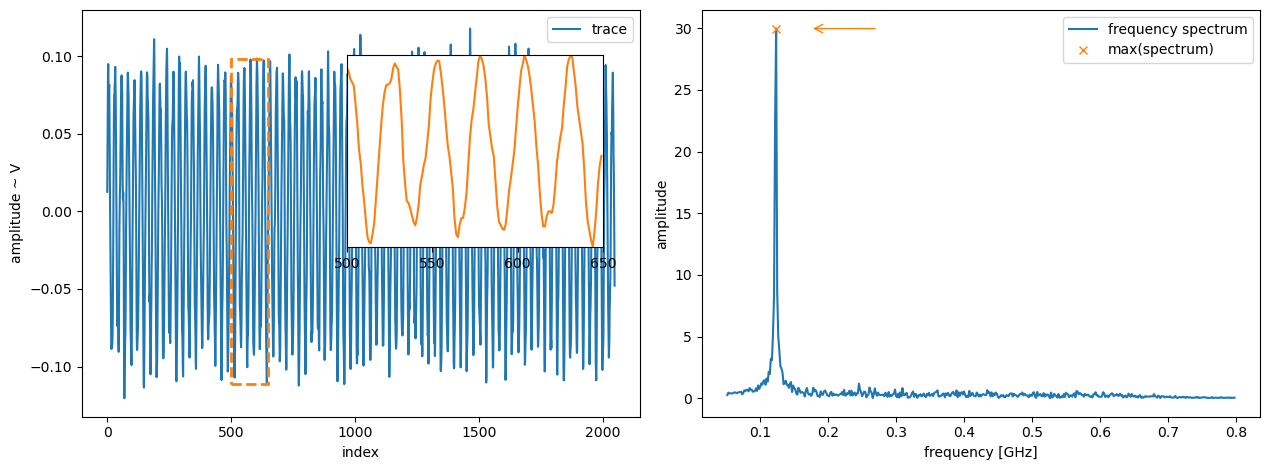

In [34]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (6.4 *2 , 4.8))

#------------------------------------------------------------------------------------------------------------------------
# cw
trace = full_trace
# Define the zoom window
start_idx = 500
rect_width = 150
end_idx = start_idx + rect_width

# Plot the full trace
xlabel = 'index'
ylabel = 'amplitude ~ V'

ax1.plot(trace, zorder=1, label='trace')
ax1.set_xlabel(xlabel)
ax1.set_ylabel(ylabel)

# Create an inset for the zoom window
ax_inset = fig.add_axes([0.275, 0.475, 0.2, 0.4])  # Position of the inset plot [x, y, width, height]
ax_inset.plot(trace[start_idx:end_idx], color='C1')
ax_inset.set_xticks([0, 50, 100, 150])
ax_inset.set_xticklabels([start_idx, start_idx + 50, start_idx + 100, end_idx])

ax_inset.set_yticks([])

ax_inset.set_xlim([0, rect_width])
ax_inset.set_ylim([np.min(trace[start_idx:end_idx]), np.max(trace[start_idx:end_idx])])



# Draw a rectangle on the main plot to indicate the zoom-in area
#rect = plt.Rectangle((start_idx, np.min(trace)), 100, np.max(trace[start_idx:end_idx]) - np.min(trace[start_idx:end_idx]),
rect = plt.Rectangle((start_idx, np.min(trace[start_idx:end_idx])), rect_width, np.max(trace[start_idx:end_idx]) - np.min(trace[start_idx:end_idx]), 
                     color='C1', zorder=2, fill=False, linestyle='--', linewidth = 2)
ax1.add_patch(rect)

#------------------------------------------------------------------------------------------------------------------------
# l1
ax2.plot(freq, spectrum, label = 'frequency spectrum')

ymax_index = np.argmax(spectrum)
ax2.plot(freq[ymax_index], spectrum[ymax_index], 'x', color = 'C1', label = 'max(spectrum)')

print('f:', freq[ymax_index], 'amp: ', spectrum[ymax_index], 'l1: ', l1)

# Add a nicer-looking arrow
arrow = FancyArrowPatch(
    (freq[ymax_index] + 0.15, spectrum[ymax_index]),  # Starting point of the arrow
    (freq[ymax_index] + 0.05, spectrum[ymax_index]),   # Ending point of the arrow
    color='C1', 
    arrowstyle='->', 
    mutation_scale=15  # Size of the arrow head
)
ax2.add_patch(arrow)

xlabel = 'frequency [GHz]'
ylabel = 'amplitude'

ax2.set_xlabel(xlabel)
ax2.set_ylabel(ylabel)


ax1.legend()
ax2.legend()

plt.tight_layout()
#fig.savefig('/home/oliver/thesis/figures/scores_multi_ax/cw_l1.pdf')

# SNR

In [35]:
reader = readRNOGData()

reader.begin([f'/home/oliver/software/Flights/combined_handcarry/station11/run1313'], overwrite_sampling_rate=3200*units.MHz, apply_baseline_correction='approximate')

event = reader.get_event_by_index(173)
station = event.get_station()
channel = station.get_channel(13)
trace = channel.get_trace()

INFO:NuRadioReco.readRNOGData:Set 0 selector(s)
INFO:NuRadioReco.readRNOGData:Parse through / read-in 1 directory(ies) / file(s).
/home/oliver/anaconda3/envs/work/lib/python3.11/site-packages/mattak/Dataset.py:214: UserWarning: data_dir is deprecated, use data_path instead. This may be removed in the future, breaking your code.
  warnings.warn("data_dir is deprecated, use data_path instead. This may be removed in the future, breaking your code.")
INFO:NuRadioReco.readRNOGData:4773 events in 1 runs/datasets have been found using the uproot Mattak backend.


Using uproot backend
Open waveforms.root (Found full run folder) ...


RMS:  0.006335457071120628 max(trace):  0.2222250208707766 SNR:  35.076399125764894


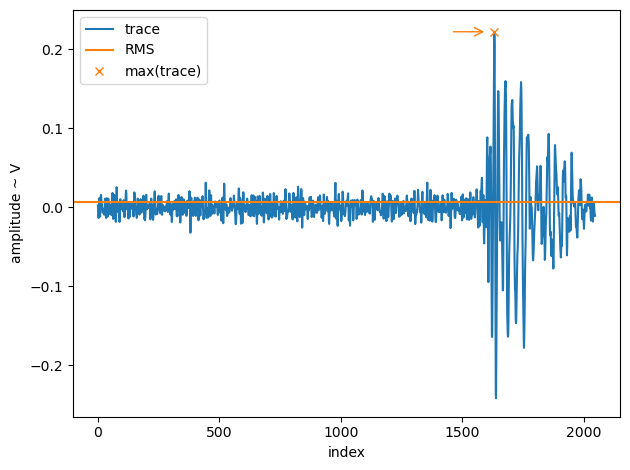

In [37]:
# get RMS
con = sqlite3.connect(f'./combined_scores_handcarry/station21_run1637_scores.db')    
RMSs = pd.read_sql_query("SELECT * FROM avg_RMS", con)
#scores = pd.read_sql_query("SELECT * FROM combined_scores", con)
#print(scores.columns)
RMS = np.array(RMSs.iloc[channel_number])[1] # get the RMS for channel = channel_number 

xlabel = 'index'
ylabel = 'amplitude ~ V'

ymax_index = np.argmax(trace)
print('RMS: ', RMS, 'max(trace): ', trace[ymax_index], 'SNR: ', trace[ymax_index] / RMS)

plt.plot(trace, label = 'trace')
plt.axhline(RMS, color = 'C1', label = 'RMS')# f'RMS = {RMS :.2e}')
plt.plot(ymax_index, trace[ymax_index], 'x', color = 'C1', label = 'max(trace)')

# Add a nicer-looking arrow
arrow = FancyArrowPatch(
    (ymax_index - 180, trace[ymax_index]),  # Starting point of the arrow
    (ymax_index - 30, trace[ymax_index]),   # Ending point of the arrow
    color='C1', 
    arrowstyle='->', 
    mutation_scale=15  # Size of the arrow head
)
plt.gca().add_patch(arrow)

plt.xlabel(xlabel)
plt.ylabel(ylabel)

plt.legend()
plt.tight_layout()
#plt.savefig('/home/oliver/thesis/figures/scores_multi_ax/SNR.pdf')

# Impulsivity

In [38]:
reader = readRNOGData()

reader.begin([f'/home/oliver/software/Flights/combined_handcarry/station11/run1313'], overwrite_sampling_rate=3200*units.MHz, apply_baseline_correction='approximate')

event = reader.get_event_by_index(192)
station = event.get_station()
channel = station.get_channel(13)
full_trace = channel.get_trace()

INFO:NuRadioReco.readRNOGData:Set 0 selector(s)
INFO:NuRadioReco.readRNOGData:Parse through / read-in 1 directory(ies) / file(s).
/home/oliver/anaconda3/envs/work/lib/python3.11/site-packages/mattak/Dataset.py:214: UserWarning: data_dir is deprecated, use data_path instead. This may be removed in the future, breaking your code.
  warnings.warn("data_dir is deprecated, use data_path instead. This may be removed in the future, breaking your code.")
INFO:NuRadioReco.readRNOGData:4773 events in 1 runs/datasets have been found using the uproot Mattak backend.


Using uproot backend
Open waveforms.root (Found full run folder) ...


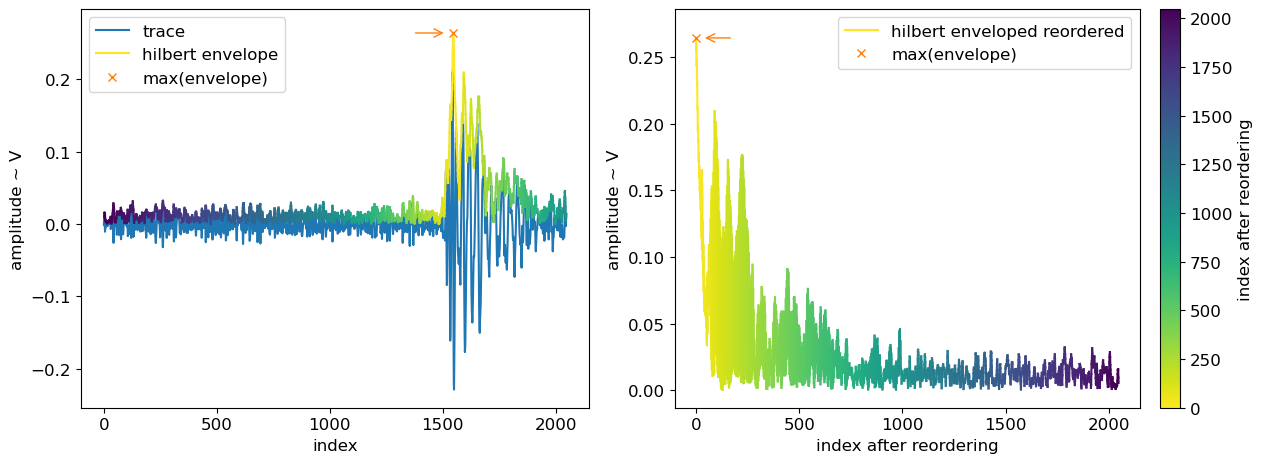

In [64]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from scipy.signal import hilbert
from matplotlib.patches import FancyArrowPatch

plt.rcParams.update({'font.size': 12})

# Assuming `full_trace` and `start_index` are already defined
start_index = 0
trace = full_trace[start_index:]

abs_hilbert = abs(hilbert(trace))
hilbert_maximum_index = np.argmax(abs_hilbert)
reordered_index = np.argsort(abs(np.arange(len(trace))-hilbert_maximum_index))
reordered_hilbert = abs_hilbert[reordered_index]
impulsivity_curve = np.cumsum(reordered_hilbert)/np.sum(reordered_hilbert)
impulsivity = 2*np.mean(impulsivity_curve)-1    

xlabel = 'index'
ylabel = 'amplitude ~ V'

# Create the main figure and axis
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12.8, 4.8))
gs = gridspec.GridSpec(1, 2, width_ratios=[15, 1])

# Hilbert plot
y = abs_hilbert
x = range(len(trace))

cmap = plt.get_cmap('viridis_r')
norm = plt.Normalize(vmin=min(x), vmax=max(x))

# Plot the original trace
ax1.plot(trace, color='C0', label='trace')

# Plot each segment of the Hilbert envelope with different colors
for i in range(len(x) - 1):
    index = reordered_index[i]
    ax1.plot(x[index:index+2], y[index:index+2], color=cmap(norm(i)))
    if i == 0:
        ax1.plot([], color=cmap(norm(i)), label='hilbert envelope')

ymax_index = np.argmax(abs_hilbert)
ax1.plot(ymax_index, abs_hilbert[ymax_index], 'x', color='C1', label='max(envelope)')

# Add arrow
arrow = FancyArrowPatch(
    (ymax_index - 180, abs_hilbert[ymax_index]), 
    (ymax_index - 30, abs_hilbert[ymax_index]), 
    color='C1', 
    arrowstyle='->', 
    mutation_scale=15
)
ax1.add_patch(arrow)

ax1.set_xlabel(xlabel)
ax1.set_ylabel(ylabel)
ax1.legend()

# Colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax2, fraction=0.046, pad=0.04)
cbar.set_label('index after reordering')

# Hilbert reordered plot
for i in range(len(x) - 1):
    index = i
    ax2.plot(x[index:index+2], reordered_hilbert[index:index+2], color=cmap(norm(i)))
    if i == 0:
        ax2.plot([], color=cmap(norm(i)), label='hilbert enveloped reordered')

ax2.set_xlabel('index after reordering')
ax2.set_ylabel(ylabel)

ymax_index = np.argmax(reordered_hilbert)
ax2.plot(ymax_index, reordered_hilbert[ymax_index], 'x', color='C1', label='max(envelope)')

# Add arrow
arrow = FancyArrowPatch(
    (ymax_index + 180, reordered_hilbert[ymax_index]), 
    (ymax_index + 30, reordered_hilbert[ymax_index]), 
    color='C1', 
    arrowstyle='->', 
    mutation_scale=15
)
ax2.add_patch(arrow)

ax2.legend()

plt.tight_layout()

#fig.savefig('/home/oliver/thesis/figures/scores_multi_ax/hilbert_plus_envelope_color.pdf')


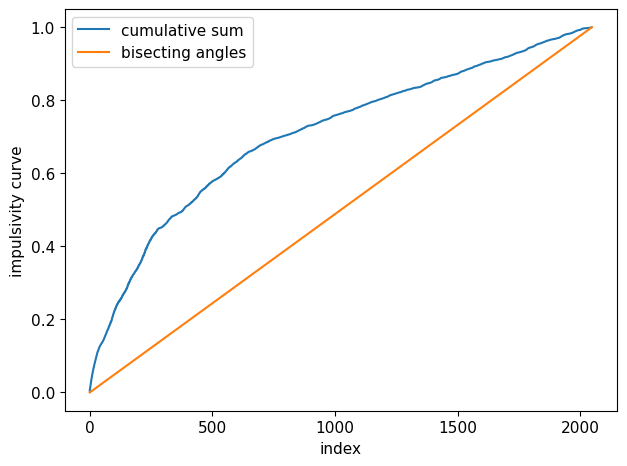

In [58]:
plt.rcParams.update({'font.size': 11})
plt.plot(impulsivity_curve, label = 'impulsivity curve')
plt.plot([0, len(trace)], [0, 1], label = 'bisecting angles')
xlabel = 'index'
ylabel = 'cumsum / sum'


plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.legend()
plt.tight_layout()
plt.savefig('/home/oliver/thesis/figures/scores_multi_ax/impulsivity_curve.pdf')

# Planes

In [ ]:
tracker = FlightTracker()